In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = "/mnt/Data/Optical/Wyvern/wyvern_dragonette-002_20250508T120023_a2d6c4ec/wyvern_dragonette-002_20250508T120023_a2d6c4ec.tiff"

In [3]:
dataset = gdal.Open(file_path, gdal.GA_ReadOnly)
if dataset is None:
    raise Exception("Failed to open file!")

# Reading metadata
print("Driver:", dataset.GetDriver().ShortName, "/", dataset.GetDriver().LongName)
print("Raster size:", dataset.RasterXSize, "x", dataset.RasterYSize)
print("Number of bands:", dataset.RasterCount)

Driver: GTiff / GeoTIFF
Raster size: 5445 x 7925
Number of bands: 31


In [4]:
num_bands = dataset.RasterCount
bands_data = np.array([dataset.GetRasterBand(i+1).ReadAsArray() for i in range(num_bands)])

# Long execution time

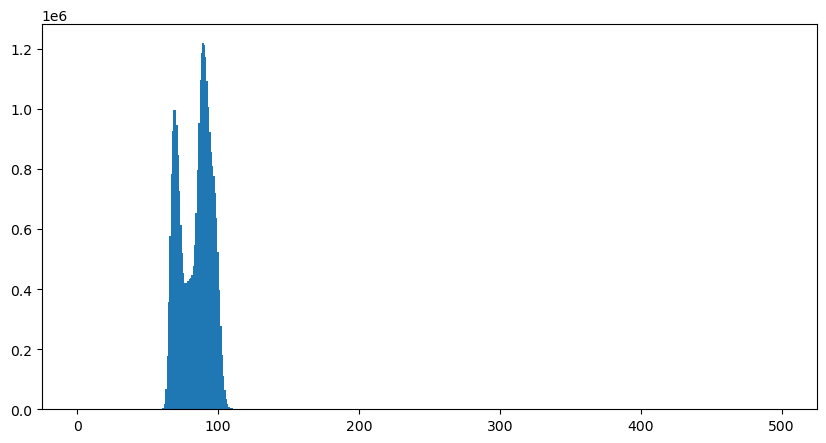

In [14]:
plt.figure(figsize=[10,5])
plt.hist(bands_data[2].flatten(), bins=256*2,range= [0,500])
plt.show()

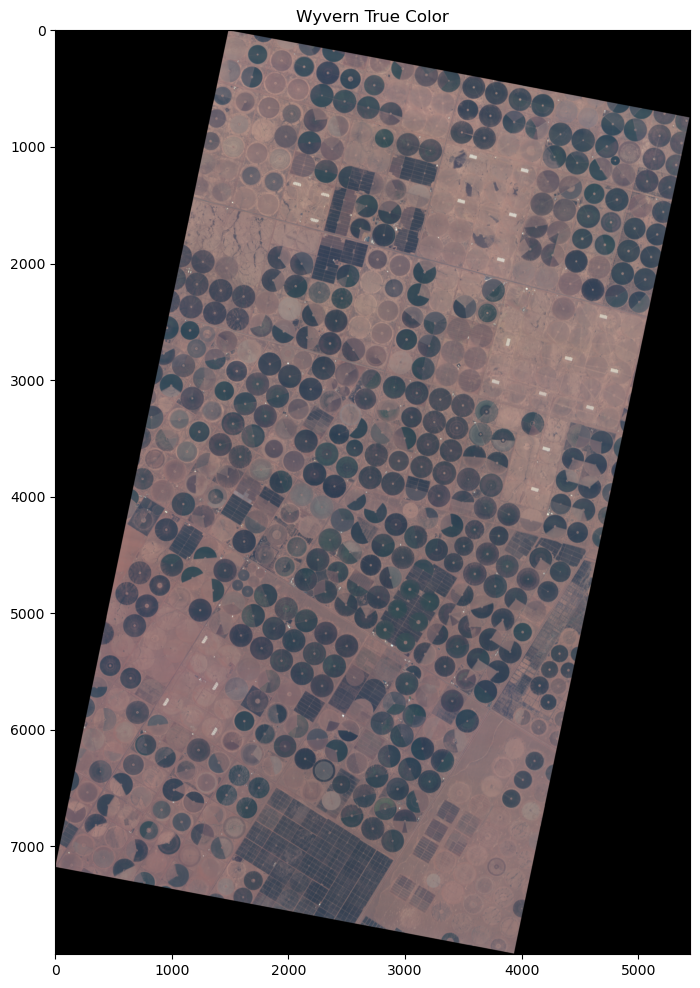

In [53]:

rgb_img = bands_data[[13, 8, 2], :, :].astype(np.float32)
rgb_img = np.moveaxis(rgb_img, 0, -1)
rgb_stretched = np.clip((rgb_img - 0) / (200 - 0), 0, 1)
plt.figure(figsize=(12, 12))
plt.imshow(rgb_stretched)
plt.title("Wyvern True Color")
plt.show()

(1000, 1000, 3)


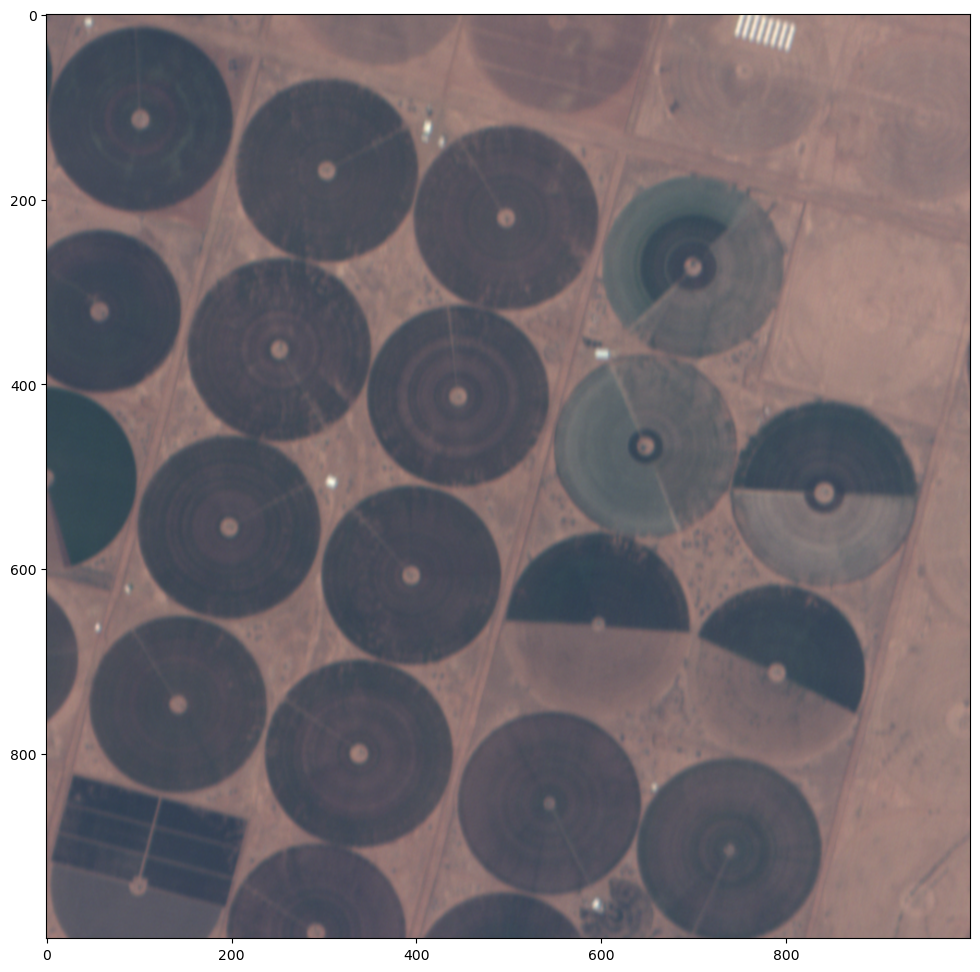

In [33]:
rgb_img_cropped = rgb_stretched[3000:4000,3000:4000].copy()
print(rgb_img_cropped.shape)
plt.figure(figsize=(12, 12))
plt.imshow(rgb_img_cropped)
plt.show()

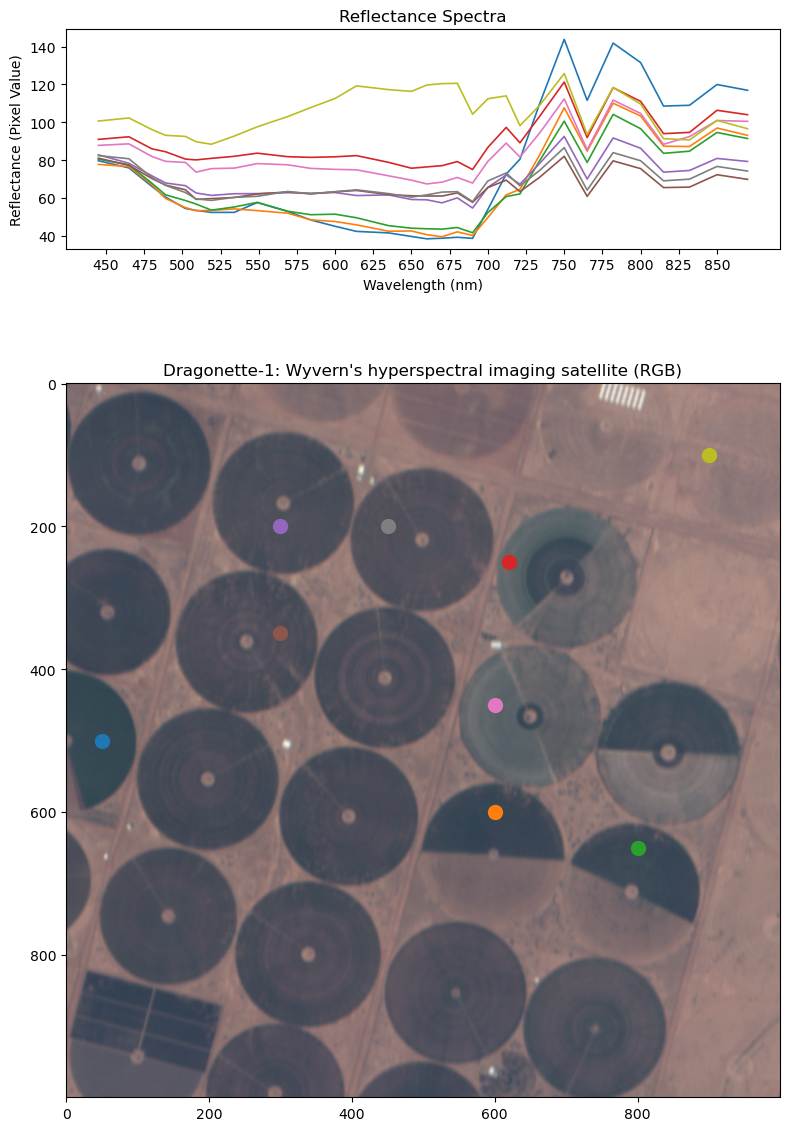

In [ ]:
pixel_coords = [
    (500, 50),
    (600, 600),
    (650, 800),
    (250, 620),
    (200, 300),
    (350, 300),
    (450, 600),
    (200, 450),
    (100, 900),
]

wavelengths = np.array([
    445, 465, 480, 489, 502, 509, 519, 534, 549, 569,
    584, 600, 614, 635, 650, 660, 670, 680,  690, 700,
    712, 721, 734, 750, 765, 782, 800, 815, 832, 850,
    870
])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12), gridspec_kw={'height_ratios': [1, 4]})

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

bands_data_cropped = bands_data[:,3000:4000,3000:4000].copy()

for idx, (y, x) in enumerate(pixel_coords):
    color = colors[idx % len(colors)]
    pixel_values = bands_data_cropped[:, y, x]
    ax1.plot(wavelengths, pixel_values, label=f'Pixel {idx+1} ({x},{y})', color=color, linewidth=1.2)

ax1.set_xticks(np.arange(450, 875, 25))
ax1.set_xlabel("Wavelength (nm)")
ax1.set_ylabel("Reflectance (Pixel Value)")
ax1.set_title("Reflectance Spectra")
#ax1.grid(True)

ax2.imshow(rgb_img_cropped)
ax2.set_title("Dragonette-1: Wyvern's hyperspectral imaging satellite (RGB)")

for idx, (y, x) in enumerate(pixel_coords):
    color = colors[idx % len(colors)]
    ax2.plot(x, y, marker='o', markersize=10, markerfacecolor=color)

plt.tight_layout()
plt.savefig("spectra_and_image.png", dpi=400, bbox_inches='tight') 
plt.show()

In [42]:
O2_absorption = (bands_data[23] + bands_data[25]) / 2
O2_absorption = O2_absorption - bands_data[24]

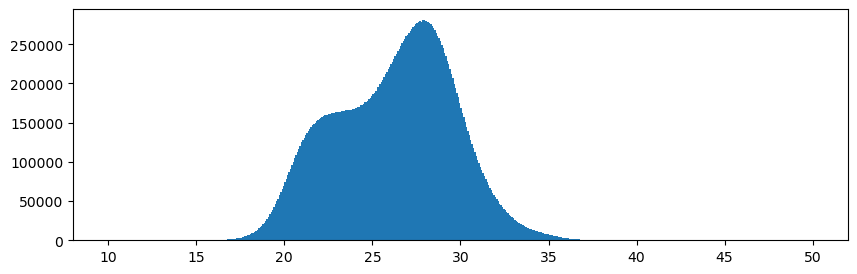

In [52]:
plt.figure(figsize=[10,3])
plt.hist(O2_absorption.flatten(), bins=256*2,range= [10,50])
plt.show()

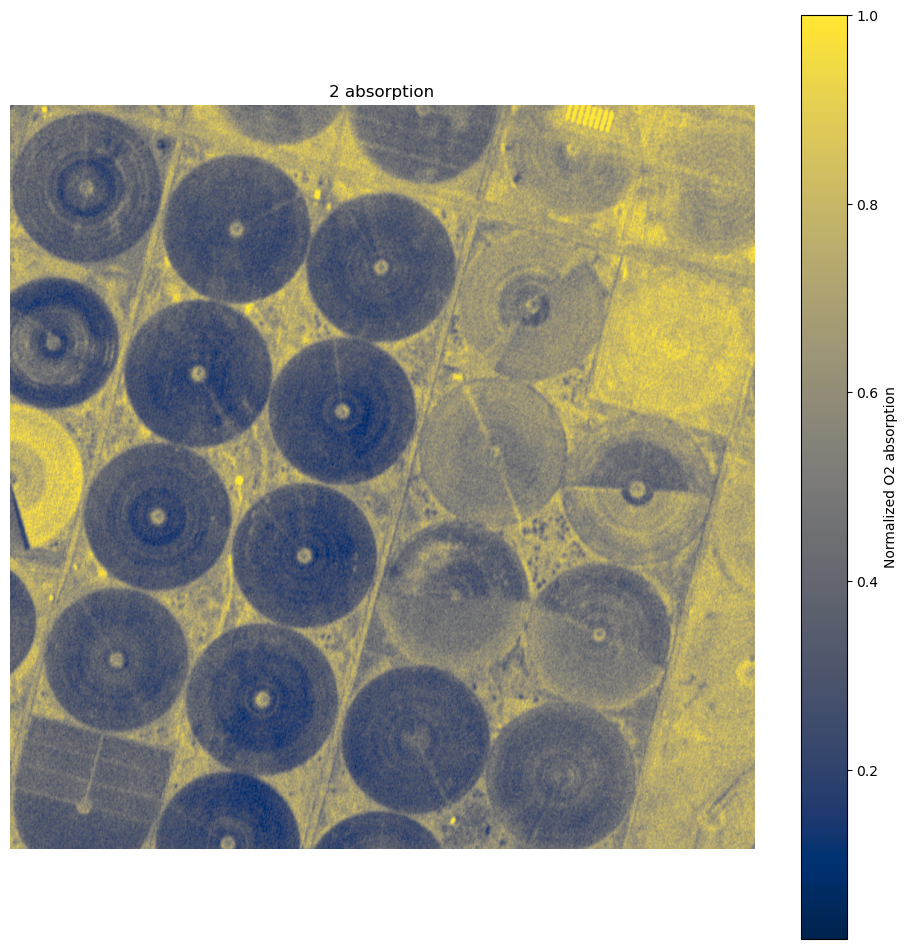

In [50]:
O2_stretched = np.clip((O2_absorption - 15) / (35 - 15), 0, 1)
O2_stretched_cropped = O2_stretched[3000:4000, 3000:4000].copy()

plt.figure(figsize=(12, 12))
im = plt.imshow(O2_stretched_cropped, cmap='cividis')
plt.title("2 absorption")
plt.colorbar(im, label="Normalized O2 absorption")
plt.axis("off")
plt.show()